# Movie Data Exploratory Data Analysis

#### Import Libraries and Load in Data

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

pd.set_option("display.max_columns",350)

In [45]:
df = pd.read_csv('./data/df_for_eda.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)
df.head(2)

rt_id   critic_name                publisher  review_type review_date  \
0  m/0814255  Ben McEachen  Sunday Mail (Australia)            1  2010-02-09   
1  m/0814255  Nick Schager           Slant Magazine            0  2010-02-10   

                                      review_content  \
0  Whether audiences will get behind The Lightnin...   
1  Harry Potter knockoffs don't come more transpa...   

                                               title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1  Percy Jackson & the Olympians: The Lightning T...   

                                                plot  \
0  Always trouble-prone, the life of teenager Per...   
1  Always trouble-prone, the life of teenager Per...   

                                   critics_consensus content_rating  \
0  Though it may seem like just another Harry Pot...             PG   
1  Though it may seem like just another Harry Pot...             PG   

                                               genre        director  \
0  Action & Adventure, Comedy, Drama, Science Fic...  Chris Columbus   
1  Action & Adventure, Comedy, Drama, Science Fic...  Chris Columbus   

                                       writer  \
0  Craig Titley, Chris Columbus, Rick Riordan   
1  Craig Titley, Chris Columbus, Rick Riordan   

                                                cast original_release_date  \
0  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
1  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   

  streaming_release_date  runtime production_company  tomatometer_status  \
0             2015-11-25    119.0   20th Century Fox                   0   
1             2015-11-25    119.0   20th Century Fox                   0   

   tomatometer_rating  tomatometer_count  audience_status  audience_rating  \
0                49.0              149.0                0             53.0   
1                49.0              149.0                0             53.0   

   audience_count  critic_id  review_score  year imdb_title          country  \
0        254421.0       1022          0.70  2010  tt0814255  UK, Canada, USA   
1        254421.0       7475          0.25  2010  tt0814255  UK, Canada, USA   

                                         description  avg_vote     votes  
0  A teenager discovers he's the descendant of a ...       5.9  174198.0  
1  A teenager discovers he's the descendant of a ...       5.9  174198.0

### Exploratory Data Analysis

Setting a copy, so there is only one movie title count. 

In [46]:
data = df.copy()

In [47]:
data = data.groupby('title').head(1)

#### Count by Content Rating

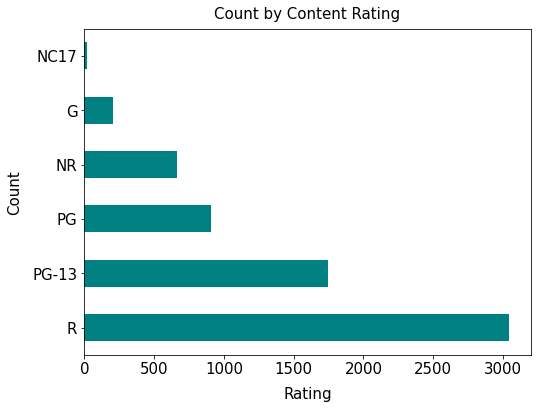

In [48]:
plt.figure(figsize = (8,6))
data['content_rating'].value_counts()[0:10].plot(kind = 'barh', color = 'teal')
plt.title('Count by Content Rating', size = 15, pad = 10)
plt.xticks(size = 15)
plt.xlabel('Rating', size = 15, labelpad = 10)
plt.yticks(size = 15)
plt.ylabel('Count', size = 15, labelpad = 10);

There are over 3,000 R-rated movies. The lowest count is NC17.

#### Count by Production Company

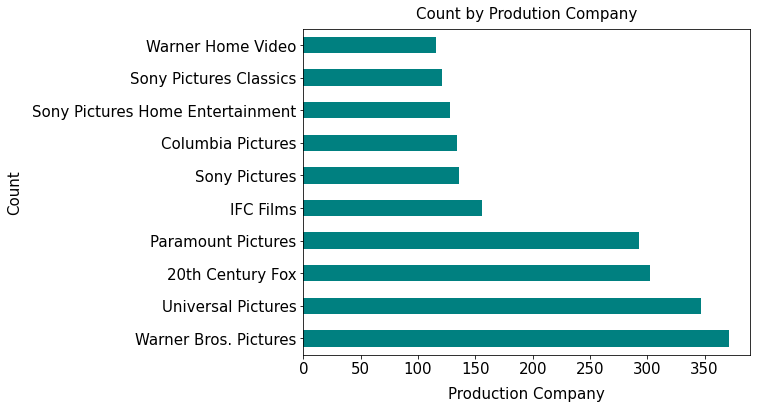

In [49]:
plt.figure(figsize = (8,6))
data['production_company'].value_counts()[0:10].plot(kind = 'barh', color = 'teal')
plt.title('Count by Prodution Company', size = 15, pad = 10)
plt.xticks(size = 15)
plt.xlabel('Production Company', size = 15, labelpad = 10)
plt.yticks(size = 15)
plt.ylabel('Count', size = 15, labelpad = 10);

Warner bros has produced the most films and Universal is trailing right behind. Warner Home has the lowest count 

#### Count by Genre

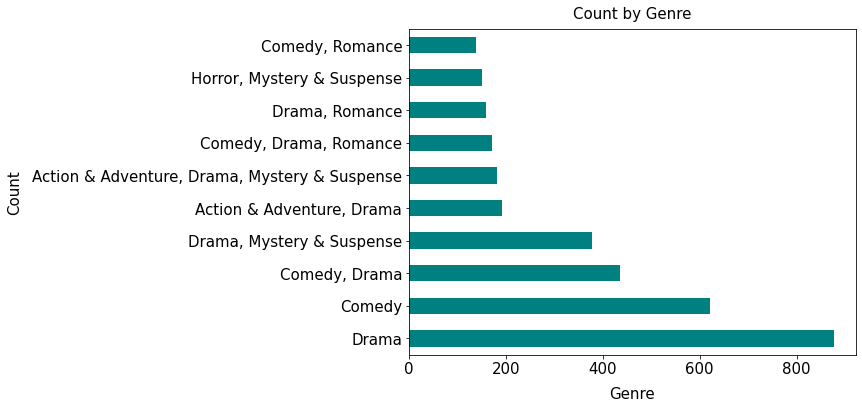

In [50]:
plt.figure(figsize = (8,6))
data['genre'].value_counts()[0:10].plot(kind = 'barh', color = 'teal')
plt.title('Count by Genre', size = 15, pad = 10)
plt.xticks(size = 15)
plt.xlabel('Genre', size = 15, labelpad = 10)
plt.yticks(size = 15)
plt.ylabel('Count', size = 15, labelpad = 10);

Drama has the most titles, with Comedy following. Movies classified as both Comedy and Drama have the top 3 count. 

In [51]:
# Looking at genre tag count: 

![image](./images/genre_tableau.png)

As the company plans future productions, it’s also helpful to consider the density of the types of genres available. Drama is almost listed twice as many times as comedy alone. And a movie can have multiple genres, which is why you see such a high count here.<br>
\* plot made in Tableau


#### Count by Director

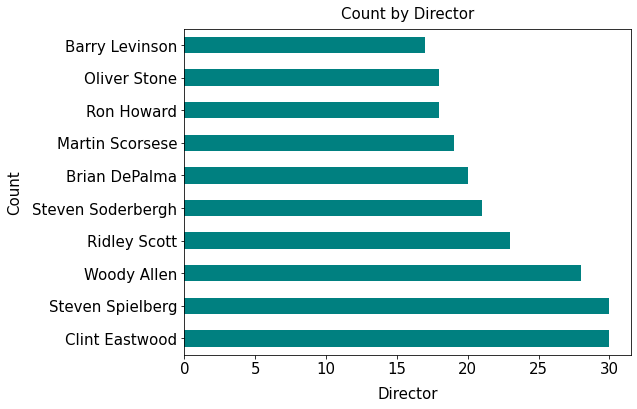

In [52]:
plt.figure(figsize = (8,6))
data['director'].value_counts()[0:10].plot(kind = 'barh', color = 'teal')
plt.title('Count by Director', size = 15, pad = 10)
plt.xticks(size = 15)
plt.xlabel('Director', size = 15, labelpad = 10)
plt.yticks(size = 15)
plt.ylabel('Count', size = 15, labelpad = 10);

Clint Eastwood and Steven Spielberg have have the highest count of movies in this dataset. The top 10 are all male directors. 

#### Critic Publisher Count

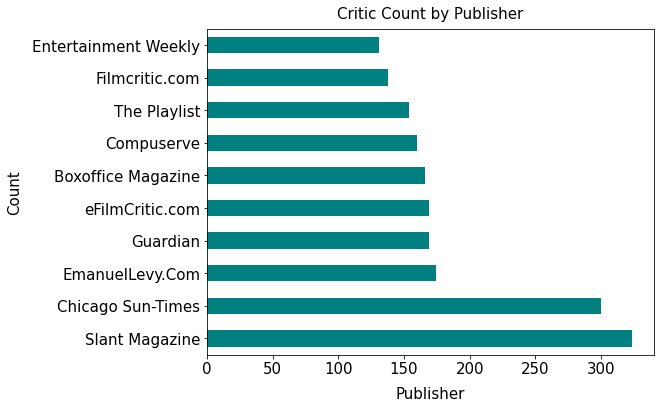

In [53]:
plt.figure(figsize = (8,6))
data['publisher'].value_counts()[0:10].plot(kind = 'barh', color = 'teal')
plt.title('Critic Count by Publisher', size = 15, pad = 10)
plt.xticks(size = 15)
plt.xlabel('Publisher', size = 15, labelpad = 10)
plt.yticks(size = 15)
plt.ylabel('Count', size = 15, labelpad = 10);

There are more critic reviews from Slant Magazine than other publishers in this dataset. Chicago Sun-Times is trailing slightly behind. 

#### Summary Statistics

In [54]:
data.describe()

review_type      runtime  tomatometer_status  tomatometer_rating  \
count  6587.000000  6587.000000         6587.000000         6587.000000   
mean      0.622742   106.120419            0.537422           58.873083   
std       0.484737    17.935150            0.498635           27.586360   
min       0.000000    22.000000            0.000000            0.000000   
25%       0.000000    94.000000            0.000000           36.500000   
50%       1.000000   103.000000            1.000000           63.000000   
75%       1.000000   115.000000            1.000000           83.000000   
max       1.000000   254.000000            1.000000          100.000000   

       tomatometer_count  audience_status  audience_rating  audience_count  \
count        6587.000000      6587.000000      6587.000000    6.587000e+03   
mean          101.862760         0.548201        61.088811    3.271333e+05   
std            75.442424         0.497709        19.553912    2.678582e+06   
min             5.000000         0.000000         9.000000    6.000000e+00   
25%            43.000000         0.000000        46.000000    6.454500e+03   
50%            79.000000         1.000000        63.000000    2.723300e+04   
75%           143.000000         1.000000        77.000000    1.009880e+05   
max           535.000000         1.000000        99.000000    3.579764e+07   

          critic_id  review_score         year     avg_vote         votes  
count   6587.000000   6587.000000  6587.000000  6587.000000  6.587000e+03  
mean    5234.201002      0.631473  2001.731593     6.393366  7.759092e+04  
std     2785.784852      0.226358    16.158480     0.996378  1.541437e+05  
min        1.000000      0.000000  1915.000000     1.900000  1.000000e+02  
25%     2873.000000      0.500000  1997.000000     5.800000  6.254000e+03  
50%     5023.000000      0.650000  2006.000000     6.500000  2.435700e+04  
75%     7933.000000      0.800000  2013.000000     7.100000  8.181200e+04  
max    10098.000000      1.000000  2020.000000     9.300000  2.278845e+06

**Summary**
- There are no outliers in the tomatometer_status, audience_status, or review type, as these are all either 0 or 1. 
- There are no outliers in the tomatometer_rating, audience_rating, review_score, or avg_vote. These features are within their range of values of either 0-10 or 0-100.
- The average tomatometer rating and audience rating are considered "Rotten" as they are below 60%. 
- The average review score is a couple of points higher, indicating that the average score is "Fresh"
- The average IMDb score is 6.39. 
- The longest runtime is 254 (assuming minutes), which seems bit long, but quite possible. Investigating below. 
- Movie release goes up to 2020. The earliest release is from 1915.

In [55]:
# Investigating movies with a runtime of 230 minutes or longer
data[data['runtime'] > 230].drop_duplicates(subset = 'title', keep = 'first')

rt_id     critic_name          publisher  review_type  \
14730   m/1004330-cleopatra  John J. Puccio   Movie Metropolis            0   
22744  m/1046038-gettysburg     Roger Ebert  Chicago Sun-Times            1   

      review_date                                     review_content  \
14730  2001-03-21  ...not required viewing by any means, nor is i...   
22744  2000-01-01  I began watching with comparative indifference...   

            title                                               plot  \
14730   Cleopatra  "Cleopatra" is a lengthy, sprawling, spectacul...   
22744  Gettysburg  This war drama depicts one of the biggest even...   

                                       critics_consensus content_rating  \
14730  Cleopatra is a lush, ostentatious, endlessly e...              G   
22744  Gettysburg's reverent approach to history is b...             PG   

                 genre              director  \
14730  Classics, Drama  Joseph L. Mankiewicz   
22744  Classics, Drama     Ronald F. Maxwell   

                                                  writer  \
14730  Joseph L. Mankiewicz, Ranald MacDougall, Sidne...   
22744                                  Ronald F. Maxwell   

                                                    cast  \
14730  Elizabeth Taylor, Richard Burton, Rex Harrison...   
22744  Tom Berenger, Martin Sheen, Jeff Daniels, Rich...   

      original_release_date streaming_release_date  runtime  \
14730            1963-06-12             2012-09-18    243.0   
22744            1993-10-08             2009-01-01    254.0   

              production_company  tomatometer_status  tomatometer_rating  \
14730           20th Century Fox                   1                62.0   
22744  Turner Home Entertainment                   1                77.0   

       tomatometer_count  audience_status  audience_rating  audience_count  \
14730               39.0                1             69.0         20541.0   
22744               22.0                1             89.0         29365.0   

       critic_id  review_score  year imdb_title country  \
14730       4900          0.50  1963  tt0002101     USA   
22744       8451          0.75  1993  tt0107007     USA   

                                             description  avg_vote    votes  
14730  The fabled queen of Egypt's affair with Roman ...       5.2    446.0  
22744  In 1863, the Northern and Southern forces figh...       7.6  25671.0

Cleopatra and Hamlet are correct, as they are over 4 hours long. 
Gettysburg is incorrect. It's 2 hours and 54 minutes. Looks like an entry error. Updating now.

In [56]:
data.at[22744,'runtime'] = 174

In [57]:
data.loc[22744]['runtime']

174.0

#### Numeric Disribution

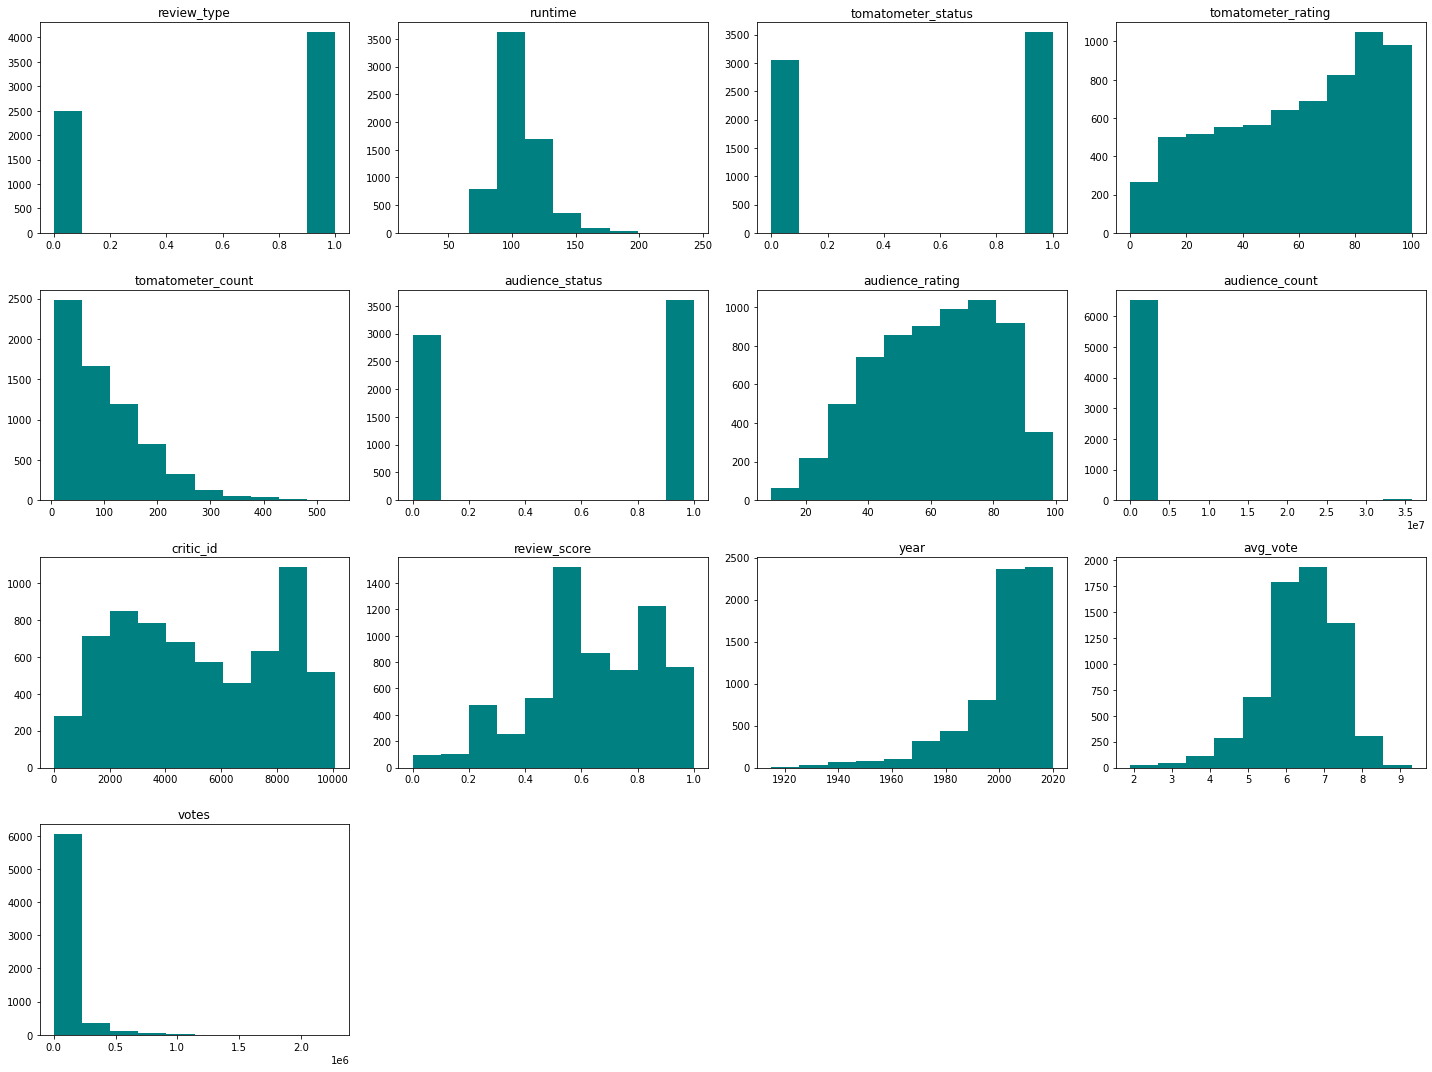

In [58]:
data.hist(figsize = (20,15), grid = False, color = 'teal');
plt.tight_layout();

No real surprises here. Audience Rating, Tomatometer Rating, and Avg Vote all are left-skewed, indicating that there are more higher reviews than negative reviews. The review score fluctuates more, maybe because this is based on individuals and not an average score. 

#### Correlations

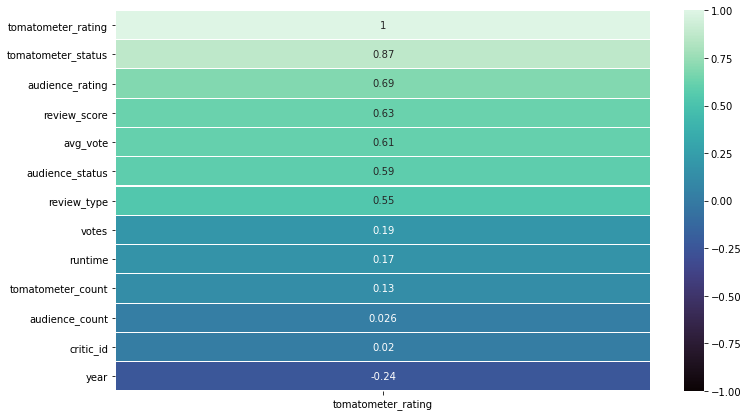

In [59]:
tomatometer_corr = data.corr()[['tomatometer_rating']]

plt.figure(figsize = (12,7))
sns.heatmap(data = (tomatometer_corr.sort_values(by = 'tomatometer_rating', ascending = False)),
           annot = True,
           linewidths=0.1,
           yticklabels= True,
           xticklabels= True,
           cmap = 'mako',
           vmin=-1,
           vmax=1)
plt.yticks(rotation = 0);

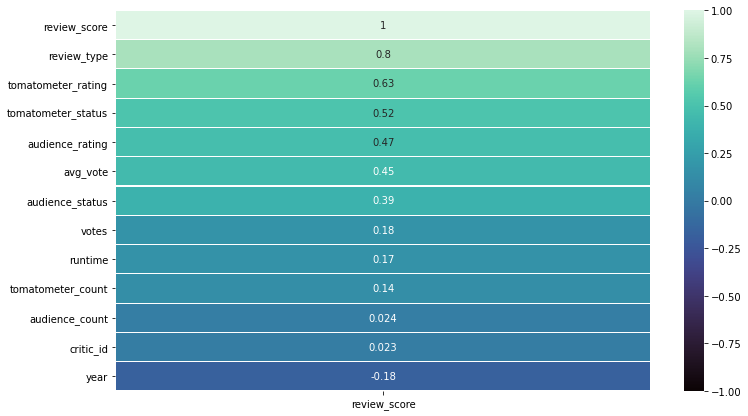

In [60]:
review_corr = data.corr()[['review_score']]

plt.figure(figsize = (12,7))
sns.heatmap(data = (review_corr.sort_values(by = 'review_score', ascending = False)),
           annot = True,
           linewidths=0.1,
           yticklabels= True,
           xticklabels= True,
           cmap = 'mako',
           vmin=-1,
           vmax=1)
plt.yticks(rotation = 0);

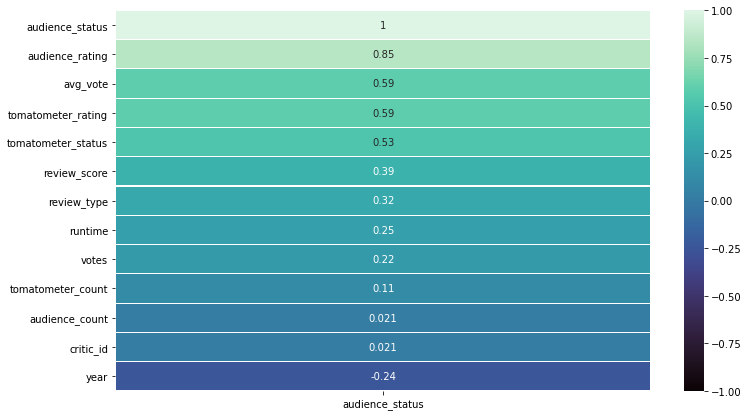

In [61]:
audience_corr = data.corr()[['audience_status']]

plt.figure(figsize = (12,7))
sns.heatmap(data = (audience_corr.sort_values(by = 'audience_status', ascending = False)),
           annot = True,
           linewidths=0.1,
           yticklabels= True,
           xticklabels= True,
           cmap = 'mako',
           vmin=-1,
           vmax=1)
plt.yticks(rotation = 0);

The top correlated features Tomatometer Status & Rating, Review Type & Score, Audience Status & Rating are dependent on each other, so it makes sense those are the top two in each correlation matrix. It is interesting to see that runtime has some correlation with scores. 

#### Original Release Date and Streaming Release Date

In [62]:
# Creating new subsets for original release and stream release
og_release_date = data.set_index('original_release_date')
stream_release_date = data.set_index('streaming_release_date')
# Converting to datetime datatype
og_release_date.index = pd.to_datetime(og_release_date.index)
stream_release_date.index = pd.to_datetime(stream_release_date.index)
# Sorting index by date
og_release_date.sort_index(inplace=True)
stream_release_date.sort_index(inplace=True)

In [63]:
# Finding time difference
time_diff = stream_release_date.index - og_release_date.index
time_diff[:10]

TimedeltaIndex(['20028 days', '17877 days', '17077 days', '16923 days',
                '16725 days', '16260 days', '15671 days', '15635 days',
                '15483 days', '15441 days'],
               dtype='timedelta64[ns]', freq=None)

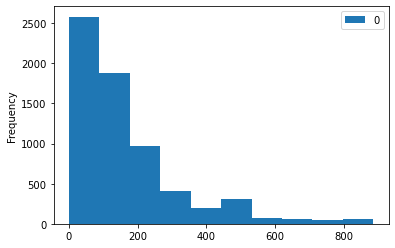

In [64]:
time_diff = pd.DataFrame(time_diff)

time_diff.astype('timedelta64[M]').plot.hist();

The time difference between original release and streaming release by month indicates that most movies were released within the first 50 months of their original movie release date. 

<AxesSubplot:ylabel='Frequency'>

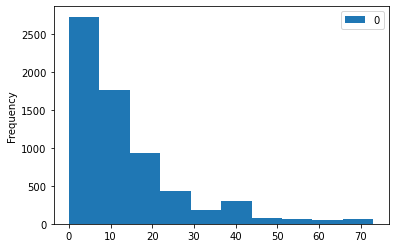

In [65]:
time_diff.astype('timedelta64[Y]').plot.hist(bins = 10)

And most movies were released on a streaming service within the first 5-6 years of the original release date

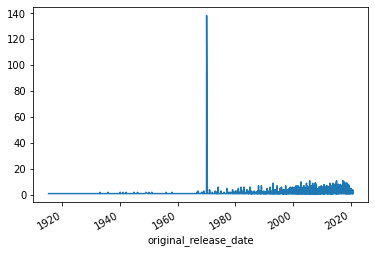

In [86]:
# Checking movie release date counts
count_og_release = og_release_date.groupby('title').head(1)
count_og_release.groupby('original_release_date')['title'].count().plot();

There was a spike in the number of movies being released in 1970, however all titles only have one count. There may be an issue with the date data. Would require further investigation, but moving on for now.  

In [85]:
data['original_release_date'].value_counts()

1970-01-01    138
2017-04-07     11
2005-09-30     11
2015-01-23     11
2017-10-20     10
             ... 
1944-09-06      1
1994-11-04      1
2003-01-18      1
1991-03-01      1
1964-06-17      1
Name: original_release_date, Length: 2888, dtype: int64

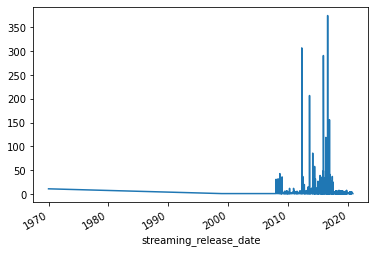

In [90]:
# Checking movie release date counts
count_stream_release = stream_release_date.groupby('title').head(1)
count_stream_release.groupby('streaming_release_date')['title'].count().plot();

The first movie to be streamed was in 1991. So anything before this date would be invalid. There is obviously an issue with the date data here, but it will not affect the overall project

#### Sentiment Analysis NLP with Original DataFrame

In [91]:
sent = SentimentIntensityAnalyzer()

Sentiment Analyzer of Rotten Tomatoes' Movie Plots

In [92]:
sents_plot = []
for row in set(df['plot']):
    sents_plot.append(sent.polarity_scores(row))

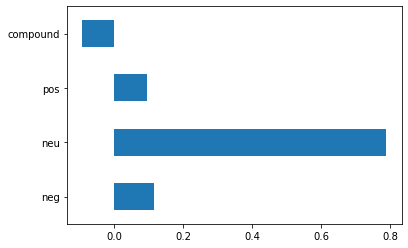

In [93]:
sents_plot_df = pd.DataFrame(sents_plot).mean()
sents_plot_df.plot(kind = 'barh');

Most of the Rotten Tomatoes' movie plots are neutral. 

Setiment Analyzer for IMDb Movie Description 

In [95]:
sents_des = []
for row in set(df['description']):
    sents_des.append(sent.polarity_scores(row))

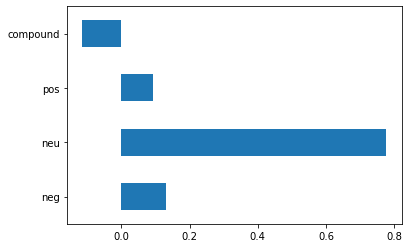

In [96]:
sents_des_df = pd.DataFrame(sents_des).mean()
sents_des_df.plot(kind = 'barh');

Most of the IMDb descriptions are neutral. The descriptions too have a larger negative compound score compared to the Rotten Tomatoes' plot

Sentiment Analyzer for reviews conent

In [97]:
sents_review = []
for row in set(df['review_content']):
    sents_review.append(sent.polarity_scores(row))

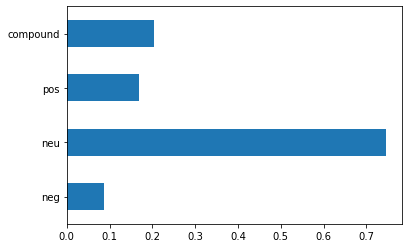

In [98]:
sents_review_df = pd.DataFrame(sents_review).mean()
sents_review_df.plot(kind = 'barh');

Most individual Rotten Tomatoes' critic reviews are neutral 

In [99]:
# Creating sentiment columns for individual rotten tomatoes' critic reviews
sentiment_review = []
for index, row in df['review_content'].items():
    text = row[0]
    sentiment = sent.polarity_scores(row)
    sentiment_review.append(sentiment)

In [100]:
sentiment_review_df = pd.DataFrame(sentiment_review, index = df.index)
cols_dict = {
    'neg':'review_negative',
    'neu':'review_neutral',
    'pos':'review_positive',
    'compound':'review_compound'
}
sentiment_review_df.rename(columns = cols_dict, inplace = True)
sentiment_review_df.head()

review_negative  review_neutral  review_positive  review_compound
0            0.080           0.727            0.193           0.7050
1            0.000           1.000            0.000           0.0000
2            0.079           0.661            0.261           0.7143
3            0.000           0.290            0.710           0.5994
4            0.080           0.769            0.151           0.3400

Setiment Analyzer for Critics Concensus 

In [101]:
sents_consensus = []
for row in set(df['critics_consensus']):
    sents_consensus.append(sent.polarity_scores(row))

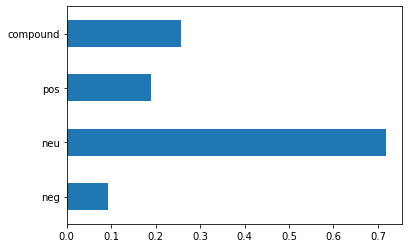

In [102]:
sents_review_df = pd.DataFrame(sents_consensus).mean()
sents_review_df.plot(kind = 'barh');

In [103]:
# Creating sentiment columns for rotten tomatoes' critics consensus reviews 
sentiment_consensus = []
for index, row in df['critics_consensus'].items():
    text = row[0]
    sentiment = sent.polarity_scores(row)
    sentiment_consensus.append(sentiment)

In [104]:
sentiment_consensus_df = pd.DataFrame(sentiment_consensus, index = df.index)
cols_dict = {
    'neg':'consensus_negative',
    'neu':'consensus_neutral',
    'pos':'consensus_positive',
    'compound':'consensus_compound'
}
sentiment_consensus_df.rename(columns = cols_dict, inplace = True)
sentiment_consensus_df.head()

consensus_negative  consensus_neutral  consensus_positive  \
0                 0.0               0.59                0.41   
1                 0.0               0.59                0.41   
2                 0.0               0.59                0.41   
3                 0.0               0.59                0.41   
4                 0.0               0.59                0.41   

   consensus_compound  
0              0.9274  
1              0.9274  
2              0.9274  
3              0.9274  
4              0.9274

### Concat Sentiment DFs & Merge with Master Dataframe

In [105]:
df.shape

(612554, 32)

In [106]:
df = pd.concat([df,sentiment_review_df, sentiment_consensus_df], axis = 1)
print(df.shape)
df.head(2)

(612554, 40)


rt_id   critic_name                publisher  review_type review_date  \
0  m/0814255  Ben McEachen  Sunday Mail (Australia)            1  2010-02-09   
1  m/0814255  Nick Schager           Slant Magazine            0  2010-02-10   

                                      review_content  \
0  Whether audiences will get behind The Lightnin...   
1  Harry Potter knockoffs don't come more transpa...   

                                               title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1  Percy Jackson & the Olympians: The Lightning T...   

                                                plot  \
0  Always trouble-prone, the life of teenager Per...   
1  Always trouble-prone, the life of teenager Per...   

                                   critics_consensus content_rating  \
0  Though it may seem like just another Harry Pot...             PG   
1  Though it may seem like just another Harry Pot...             PG   

                                               genre        director  \
0  Action & Adventure, Comedy, Drama, Science Fic...  Chris Columbus   
1  Action & Adventure, Comedy, Drama, Science Fic...  Chris Columbus   

                                       writer  \
0  Craig Titley, Chris Columbus, Rick Riordan   
1  Craig Titley, Chris Columbus, Rick Riordan   

                                                cast original_release_date  \
0  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
1  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   

  streaming_release_date  runtime production_company  tomatometer_status  \
0             2015-11-25    119.0   20th Century Fox                   0   
1             2015-11-25    119.0   20th Century Fox                   0   

   tomatometer_rating  tomatometer_count  audience_status  audience_rating  \
0                49.0              149.0                0             53.0   
1                49.0              149.0                0             53.0   

   audience_count  critic_id  review_score  year imdb_title          country  \
0        254421.0       1022          0.70  2010  tt0814255  UK, Canada, USA   
1        254421.0       7475          0.25  2010  tt0814255  UK, Canada, USA   

                                         description  avg_vote     votes  \
0  A teenager discovers he's the descendant of a ...       5.9  174198.0   
1  A teenager discovers he's the descendant of a ...       5.9  174198.0   

   review_negative  review_neutral  review_positive  review_compound  \
0             0.08           0.727            0.193            0.705   
1             0.00           1.000            0.000            0.000   

   consensus_negative  consensus_neutral  consensus_positive  \
0                 0.0               0.59                0.41   
1                 0.0               0.59                0.41   

   consensus_compound  
0              0.9274  
1              0.9274

Creating Weighted Score Column in Google Colab since Kernel Keeps Crashing

In [107]:
df = df.reset_index()

In [108]:
df.head(2)

index      rt_id   critic_name                publisher  review_type  \
0      0  m/0814255  Ben McEachen  Sunday Mail (Australia)            1   
1      1  m/0814255  Nick Schager           Slant Magazine            0   

  review_date                                     review_content  \
0  2010-02-09  Whether audiences will get behind The Lightnin...   
1  2010-02-10  Harry Potter knockoffs don't come more transpa...   

                                               title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1  Percy Jackson & the Olympians: The Lightning T...   

                                                plot  \
0  Always trouble-prone, the life of teenager Per...   
1  Always trouble-prone, the life of teenager Per...   

                                   critics_consensus content_rating  \
0  Though it may seem like just another Harry Pot...             PG   
1  Though it may seem like just another Harry Pot...             PG   

                                               genre        director  \
0  Action & Adventure, Comedy, Drama, Science Fic...  Chris Columbus   
1  Action & Adventure, Comedy, Drama, Science Fic...  Chris Columbus   

                                       writer  \
0  Craig Titley, Chris Columbus, Rick Riordan   
1  Craig Titley, Chris Columbus, Rick Riordan   

                                                cast original_release_date  \
0  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
1  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   

  streaming_release_date  runtime production_company  tomatometer_status  \
0             2015-11-25    119.0   20th Century Fox                   0   
1             2015-11-25    119.0   20th Century Fox                   0   

   tomatometer_rating  tomatometer_count  audience_status  audience_rating  \
0                49.0              149.0                0             53.0   
1                49.0              149.0                0             53.0   

   audience_count  critic_id  review_score  year imdb_title          country  \
0        254421.0       1022          0.70  2010  tt0814255  UK, Canada, USA   
1        254421.0       7475          0.25  2010  tt0814255  UK, Canada, USA   

                                         description  avg_vote     votes  \
0  A teenager discovers he's the descendant of a ...       5.9  174198.0   
1  A teenager discovers he's the descendant of a ...       5.9  174198.0   

   review_negative  review_neutral  review_positive  review_compound  \
0             0.08           0.727            0.193            0.705   
1             0.00           1.000            0.000            0.000   

   consensus_negative  consensus_neutral  consensus_positive  \
0                 0.0               0.59                0.41   
1                 0.0               0.59                0.41   

   consensus_compound  
0              0.9274  
1              0.9274

In [109]:
df.dtypes

index                       int64
rt_id                      object
critic_name                object
publisher                  object
review_type                 int64
review_date                object
review_content             object
title                      object
plot                       object
critics_consensus          object
content_rating             object
genre                      object
director                   object
writer                     object
cast                       object
original_release_date      object
streaming_release_date     object
runtime                   float64
production_company         object
tomatometer_status          int64
tomatometer_rating        float64
tomatometer_count         float64
audience_status             int64
audience_rating           float64
audience_count            float64
critic_id                   int64
review_score              float64
year                        int64
imdb_title                 object
country       

#### Creating Aggregated Score Consisting of both Rotten Tomatoes and IMDb Ratings

In [110]:
# Getting rating values on same scale
df['avg_vote'] = df['avg_vote'] * 10

df['review_score'] = df['review_score'] * 100

In [111]:
df['review_score']

0          70.0
1          25.0
2          70.0
3          75.0
4          60.0
          ...  
612549     75.0
612550     83.0
612551     83.0
612552    100.0
612553    100.0
Name: review_score, Length: 612554, dtype: float64

In [112]:
# Getting averages
df['score'] = (df['tomatometer_rating'] + df['audience_rating'] + df['review_score'] + df['avg_vote']) / 4

In [113]:
df['score']

0         57.75
1         46.50
2         57.75
3         59.00
4         55.25
          ...  
612549    82.25
612550    86.75
612551    84.25
612552    91.00
612553    88.50
Name: score, Length: 612554, dtype: float64

In [114]:
# Getting weighted by title
weighted = df.groupby('title')['score'].mean()
weighted = pd.DataFrame(weighted)
weighted = weighted.reset_index()

In [115]:
weighted.isnull().sum()

title    0
score    0
dtype: int64

In [116]:
df.shape

(612554, 42)

In [117]:
# Merging with new score column
df = pd.merge(left = df, right = weighted, left_on = 'title', right_on = 'title', how = 'left')
df.head(2)

index      rt_id   critic_name                publisher  review_type  \
0      0  m/0814255  Ben McEachen  Sunday Mail (Australia)            1   
1      1  m/0814255  Nick Schager           Slant Magazine            0   

  review_date                                     review_content  \
0  2010-02-09  Whether audiences will get behind The Lightnin...   
1  2010-02-10  Harry Potter knockoffs don't come more transpa...   

                                               title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1  Percy Jackson & the Olympians: The Lightning T...   

                                                plot  \
0  Always trouble-prone, the life of teenager Per...   
1  Always trouble-prone, the life of teenager Per...   

                                   critics_consensus content_rating  \
0  Though it may seem like just another Harry Pot...             PG   
1  Though it may seem like just another Harry Pot...             PG   

                                               genre        director  \
0  Action & Adventure, Comedy, Drama, Science Fic...  Chris Columbus   
1  Action & Adventure, Comedy, Drama, Science Fic...  Chris Columbus   

                                       writer  \
0  Craig Titley, Chris Columbus, Rick Riordan   
1  Craig Titley, Chris Columbus, Rick Riordan   

                                                cast original_release_date  \
0  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
1  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   

  streaming_release_date  runtime production_company  tomatometer_status  \
0             2015-11-25    119.0   20th Century Fox                   0   
1             2015-11-25    119.0   20th Century Fox                   0   

   tomatometer_rating  tomatometer_count  audience_status  audience_rating  \
0                49.0              149.0                0             53.0   
1                49.0              149.0                0             53.0   

   audience_count  critic_id  review_score  year imdb_title          country  \
0        254421.0       1022          70.0  2010  tt0814255  UK, Canada, USA   
1        254421.0       7475          25.0  2010  tt0814255  UK, Canada, USA   

                                         description  avg_vote     votes  \
0  A teenager discovers he's the descendant of a ...      59.0  174198.0   
1  A teenager discovers he's the descendant of a ...      59.0  174198.0   

   review_negative  review_neutral  review_positive  review_compound  \
0             0.08           0.727            0.193            0.705   
1             0.00           1.000            0.000            0.000   

   consensus_negative  consensus_neutral  consensus_positive  \
0                 0.0               0.59                0.41   
1                 0.0               0.59                0.41   

   consensus_compound  score_x    score_y  
0              0.9274    57.75  53.953125  
1              0.9274    46.50  53.953125

In [118]:
df.drop(columns = ['score_x'], inplace = True)
df.rename(columns = {'score_y':'score'}, inplace = True)

In [119]:
# Rounding score to two decimal points
df['score'] = round(df['score'],2)

df.head()

index      rt_id       critic_name                publisher  review_type  \
0      0  m/0814255      Ben McEachen  Sunday Mail (Australia)            1   
1      1  m/0814255      Nick Schager           Slant Magazine            0   
2      2  m/0814255  Bill Goodykoontz         Arizona Republic            1   
3      3  m/0814255    Jordan Hoffman                      UGO            1   
4      4  m/0814255      Jim Schembri      The Age (Australia)            1   

  review_date                                     review_content  \
0  2010-02-09  Whether audiences will get behind The Lightnin...   
1  2010-02-10  Harry Potter knockoffs don't come more transpa...   
2  2010-02-10  Percy Jackson isn't a great movie, but it's a ...   
3  2010-02-10                         Fun, brisk and imaginative   
4  2010-02-10  Crammed with dragons, set-destroying fights an...   

                                               title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1  Percy Jackson & the Olympians: The Lightning T...   
2  Percy Jackson & the Olympians: The Lightning T...   
3  Percy Jackson & the Olympians: The Lightning T...   
4  Percy Jackson & the Olympians: The Lightning T...   

                                                plot  \
0  Always trouble-prone, the life of teenager Per...   
1  Always trouble-prone, the life of teenager Per...   
2  Always trouble-prone, the life of teenager Per...   
3  Always trouble-prone, the life of teenager Per...   
4  Always trouble-prone, the life of teenager Per...   

                                   critics_consensus content_rating  \
0  Though it may seem like just another Harry Pot...             PG   
1  Though it may seem like just another Harry Pot...             PG   
2  Though it may seem like just another Harry Pot...             PG   
3  Though it may seem like just another Harry Pot...             PG   
4  Though it may seem like just another Harry Pot...             PG   

                                               genre        director  \
0  Action & Adventure, Comedy, Drama, Science Fic...  Chris Columbus   
1  Action & Adventure, Comedy, Drama, Science Fic...  Chris Columbus   
2  Action & Adventure, Comedy, Drama, Science Fic...  Chris Columbus   
3  Action & Adventure, Comedy, Drama, Science Fic...  Chris Columbus   
4  Action & Adventure, Comedy, Drama, Science Fic...  Chris Columbus   

                                       writer  \
0  Craig Titley, Chris Columbus, Rick Riordan   
1  Craig Titley, Chris Columbus, Rick Riordan   
2  Craig Titley, Chris Columbus, Rick Riordan   
3  Craig Titley, Chris Columbus, Rick Riordan   
4  Craig Titley, Chris Columbus, Rick Riordan   

                                                cast original_release_date  \
0  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
1  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
2  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
3  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
4  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   

  streaming_release_date  runtime production_company  tomatometer_status  \
0             2015-11-25    119.0   20th Century Fox                   0   
1             2015-11-25    119.0   20th Century Fox                   0   
2             2015-11-25    119.0   20th Century Fox                   0   
3             2015-11-25    119.0   20th Century Fox                   0   
4             2015-11-25    119.0   20th Century Fox                   0   

   tomatometer_rating  tomatometer_count  audience_status  audience_rating  \
0                49.0              149.0                0             53.0   
1                49.0              149.0                0             53.0   
2                49.0              149.0                0             53.0   
3                49.0              149.0            

In [120]:
# Renaming columns
df.rename(columns = {'description':'imdb_plot','avg_vote':'imdb_score','votes':'imdb_count'}, inplace = True)

In [121]:
# Setting copy of df
df_copy = df.copy()

In [122]:
# Grouping by 2 title counts, to make dataset easier to process
df = df.groupby('title').head(2)
df.drop(columns = 'index', inplace = True)

In [123]:
print(df.shape)
df.head(2)

(13173, 41)


rt_id   critic_name                publisher  review_type review_date  \
0  m/0814255  Ben McEachen  Sunday Mail (Australia)            1  2010-02-09   
1  m/0814255  Nick Schager           Slant Magazine            0  2010-02-10   

                                      review_content  \
0  Whether audiences will get behind The Lightnin...   
1  Harry Potter knockoffs don't come more transpa...   

                                               title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1  Percy Jackson & the Olympians: The Lightning T...   

                                                plot  \
0  Always trouble-prone, the life of teenager Per...   
1  Always trouble-prone, the life of teenager Per...   

                                   critics_consensus content_rating  \
0  Though it may seem like just another Harry Pot...             PG   
1  Though it may seem like just another Harry Pot...             PG   

                                               genre        director  \
0  Action & Adventure, Comedy, Drama, Science Fic...  Chris Columbus   
1  Action & Adventure, Comedy, Drama, Science Fic...  Chris Columbus   

                                       writer  \
0  Craig Titley, Chris Columbus, Rick Riordan   
1  Craig Titley, Chris Columbus, Rick Riordan   

                                                cast original_release_date  \
0  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
1  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   

  streaming_release_date  runtime production_company  tomatometer_status  \
0             2015-11-25    119.0   20th Century Fox                   0   
1             2015-11-25    119.0   20th Century Fox                   0   

   tomatometer_rating  tomatometer_count  audience_status  audience_rating  \
0                49.0              149.0                0             53.0   
1                49.0              149.0                0             53.0   

   audience_count  critic_id  review_score  year imdb_title          country  \
0        254421.0       1022          70.0  2010  tt0814255  UK, Canada, USA   
1        254421.0       7475          25.0  2010  tt0814255  UK, Canada, USA   

                                           imdb_plot  imdb_score  imdb_count  \
0  A teenager discovers he's the descendant of a ...        59.0    174198.0   
1  A teenager discovers he's the descendant of a ...        59.0    174198.0   

   review_negative  review_neutral  review_positive  review_compound  \
0             0.08           0.727            0.193            0.705   
1             0.00           1.000            0.000            0.000   

   consensus_negative  consensus_neutral  consensus_positive  \
0                 0.0               0.59                0.41   
1                 0.0               0.59                0.41   

   consensus_compound  score  
0              0.9274  53.95  
1              0.9274  53.95

In [125]:
# Saving new dataset for pre-processing
df.to_csv('./data/df_to_preprocess.csv')

#### Further EDA for Tableau 

In [127]:
# Splitting and exploding country and genre columns to plot in Tableau

df['country'] = df['country'].str.split(',')
df['genre'] = df['genre'].str.split(',')

df = df.explode('genre')
df = df.explode('country')

In [128]:
df.head()

rt_id   critic_name                publisher  review_type review_date  \
0  m/0814255  Ben McEachen  Sunday Mail (Australia)            1  2010-02-09   
0  m/0814255  Ben McEachen  Sunday Mail (Australia)            1  2010-02-09   
0  m/0814255  Ben McEachen  Sunday Mail (Australia)            1  2010-02-09   
0  m/0814255  Ben McEachen  Sunday Mail (Australia)            1  2010-02-09   
0  m/0814255  Ben McEachen  Sunday Mail (Australia)            1  2010-02-09   

                                      review_content  \
0  Whether audiences will get behind The Lightnin...   
0  Whether audiences will get behind The Lightnin...   
0  Whether audiences will get behind The Lightnin...   
0  Whether audiences will get behind The Lightnin...   
0  Whether audiences will get behind The Lightnin...   

                                               title  \
0  Percy Jackson & the Olympians: The Lightning T...   
0  Percy Jackson & the Olympians: The Lightning T...   
0  Percy Jackson & the Olympians: The Lightning T...   
0  Percy Jackson & the Olympians: The Lightning T...   
0  Percy Jackson & the Olympians: The Lightning T...   

                                                plot  \
0  Always trouble-prone, the life of teenager Per...   
0  Always trouble-prone, the life of teenager Per...   
0  Always trouble-prone, the life of teenager Per...   
0  Always trouble-prone, the life of teenager Per...   
0  Always trouble-prone, the life of teenager Per...   

                                   critics_consensus content_rating  \
0  Though it may seem like just another Harry Pot...             PG   
0  Though it may seem like just another Harry Pot...             PG   
0  Though it may seem like just another Harry Pot...             PG   
0  Though it may seem like just another Harry Pot...             PG   
0  Though it may seem like just another Harry Pot...             PG   

                genre        director  \
0  Action & Adventure  Chris Columbus   
0  Action & Adventure  Chris Columbus   
0  Action & Adventure  Chris Columbus   
0              Comedy  Chris Columbus   
0              Comedy  Chris Columbus   

                                       writer  \
0  Craig Titley, Chris Columbus, Rick Riordan   
0  Craig Titley, Chris Columbus, Rick Riordan   
0  Craig Titley, Chris Columbus, Rick Riordan   
0  Craig Titley, Chris Columbus, Rick Riordan   
0  Craig Titley, Chris Columbus, Rick Riordan   

                                                cast original_release_date  \
0  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
0  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
0  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
0  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
0  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   

  streaming_release_date  runtime production_company  tomatometer_status  \
0             2015-11-25    119.0   20th Century Fox                   0   
0             2015-11-25    119.0   20th Century Fox                   0   
0             2015-11-25    119.0   20th Century Fox                   0   
0             2015-11-25    119.0   20th Century Fox                   0   
0             2015-11-25    119.0   20th Century Fox                   0   

   tomatometer_rating  tomatometer_count  audience_status  audience_rating  \
0                49.0              149.0                0             53.0   
0                49.0              149.0                0             53.0   
0                49.0              149.0                0             53.0   
0                49.0              149.0                0             53.0   
0                49.0              149.0                0             53.0   

   audience_count  critic_id  review_score  year imdb_title  country  \
0        254421.0       1022          70.0  2010  tt0814255       UK   
0      

In [130]:
# Dropping columns that are not needed for further EDA in Tableau
df.drop(columns = ['rt_id', 'critic_name','review_content', 'plot', 'critics_consensus',
             'director', 'writer', 'cast', 'critic_id', 'imdb_title'], inplace = True)

In [131]:
df.shape

(43788, 31)

In [132]:
# Dataset that has multiple counts for title
df.to_csv('./data/df_for_tableau.csv')

In [133]:
# Setting dataset to one title count for further eda
df = df.groupby('title').head(1)

df['audience_status'].value_counts()

1    3611
0    2976
Name: audience_status, dtype: int64

In [134]:
# Resetting audience, review, and tomatometer to have Fresh or Rotten listed for EDA
df['audience_status'] = ['Fresh' if i == 1 else 'Rotten' for i in df['audience_status'].values]
df['review_type'] = ['Fresh' if i == 1 else 'Rotten' for i in df['review_type'].values]
df['tomatometer_status'] = ['Fresh' if i == 1 else 'Rotten' for i in df['tomatometer_status'].values]

In [135]:
df.head(2)

publisher review_type review_date  \
0    Sunday Mail (Australia)       Fresh  2010-02-09   
120          eFilmCritic.com       Fresh  2010-01-31   

                                                 title content_rating  \
0    Percy Jackson & the Olympians: The Lightning T...             PG   
120                                        Please Give              R   

                  genre original_release_date streaming_release_date  runtime  \
0    Action & Adventure            2010-02-12             2015-11-25    119.0   
120              Comedy            2010-04-30             2012-09-04     90.0   

         production_company tomatometer_status  tomatometer_rating  \
0          20th Century Fox             Rotten                49.0   
120  Sony Pictures Classics              Fresh                87.0   

     tomatometer_count audience_status  audience_rating  audience_count  \
0                149.0          Rotten             53.0        254421.0   
120              142.0           Fresh             64.0         11574.0   

     review_score  year country  \
0            70.0  2010      UK   
120          75.0  2010     USA   

                                             imdb_plot  imdb_score  \
0    A teenager discovers he's the descendant of a ...        59.0   
120  In New York City, a husband and wife butt head...        66.0   

     imdb_count  review_negative  review_neutral  review_positive  \
0      174198.0             0.08           0.727            0.193   
120     10928.0             0.00           0.928            0.072   

     review_compound  consensus_negative  consensus_neutral  \
0             0.7050                 0.0              0.590   
120           0.4767                 0.0              0.885   

     consensus_positive  consensus_compound  score  
0                 0.410              0.9274  53.95  
120               0.115              0.5023  73.53

In [136]:
# Grouped by 1 Title - For Tableau only
df.to_csv('./data/df_for_tableau2.csv')

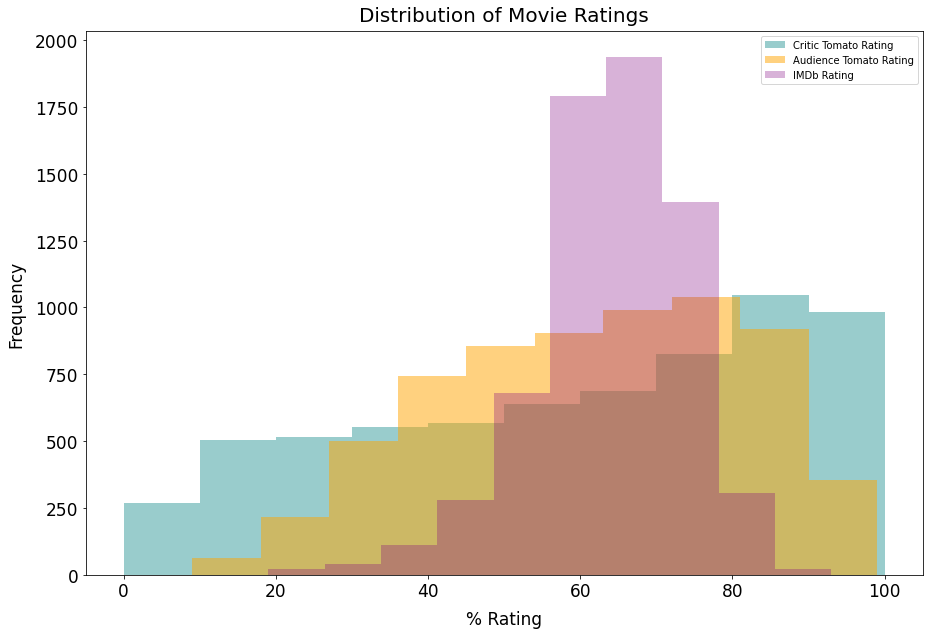

In [77]:
# Distribution of word count logged

plt.figure(figsize = (15,10))


plt.hist(x = df['tomatometer_rating'], color="teal", label="Critic Tomato Rating", alpha = 0.4, stacked = True)
plt.hist(x = df['audience_rating'],color="orange", label="Audience Tomato Rating", alpha = 0.5, stacked = True)
plt.hist(x = df['imdb_score'],color="purple", label="IMDb Rating", alpha = 0.3, stacked = True)

plt.title('Distribution of Movie Ratings', size = 20, pad = 10)
plt.ylabel(ylabel = 'Frequency', size = 17, labelpad = 10)
plt.xlabel(xlabel = '% Rating', size = 17, labelpad = 10)
plt.xticks(size = 17)
plt.yticks(size = 17)
plt.legend(); 
plt.savefig('./images/distribution_of_ratings.png');

What’s good to see is that the distribution of ratings is all skewed to the left, which means that people tend to give movies higher ratings. IMDb scores are much more condensed, while rotten tomatoes critic and audience scores are a bit more dispersed. 


#### Tableau Plots

##### Rotten vs. Fresh Count

![rotten_vs_fresh](./images/rotten_vs_fresh.png)

You can see the individual critics give the highest amount of Fresh vs Rotten ratings, however the critics consensus (Tomatometer status) has the highest amount of movies voted Rotten


!['map'](./images/map_tableau.png)

It’s also important to note that the movies in the dataset are from all over the world. 
Here you can see the countries with the most titles are in dark blue and the least in light blue U.S., Canada, Australia, parts of Europe Have the highest count of movie titles. 
